<a href="https://colab.research.google.com/github/Saurabh-Kurhade-Patil/Data-Science-Notebooks/blob/main/TruckVsCarClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Dataset Import
    Dataset import for car vs truck classification problem.
    Importing all the necessary libraries at one place for easy tracking

In [2]:
!kaggle datasets download -d ryanholbrook/car-or-truck

Dataset URL: https://www.kaggle.com/datasets/ryanholbrook/car-or-truck
License(s): copyright-authors
  0% 0.00/77.7M [00:00<?, ?B/s]
100% 77.7M/77.7M [00:00<00:00, 1.78GB/s]


In [3]:
!unzip -q car-or-truck.zip

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

## 2. Generators
    generators - sending batches to model (rather than sending the whole dataset)

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 8,
    image_size = (128, 128),
    validation_split = 0.2,
    subset = 'training',
    seed= 123
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/valid',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 8,
    image_size = (128, 128),
    validation_split = 0.2,
    subset = 'validation',
    seed= 123
)

Found 5117 files belonging to 2 classes.
Using 4094 files for training.
Found 5051 files belonging to 2 classes.
Using 1010 files for validation.


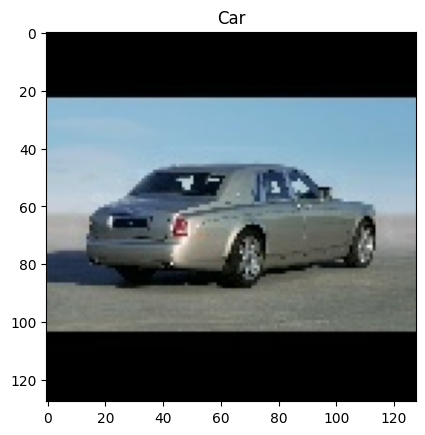

In [6]:
for image, label in train_ds.take(1):
  plt.imshow(image[6].numpy().astype('uint8'))
  plt.title(train_ds.class_names[label[6]])

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:GPU:0}} slice index 8 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

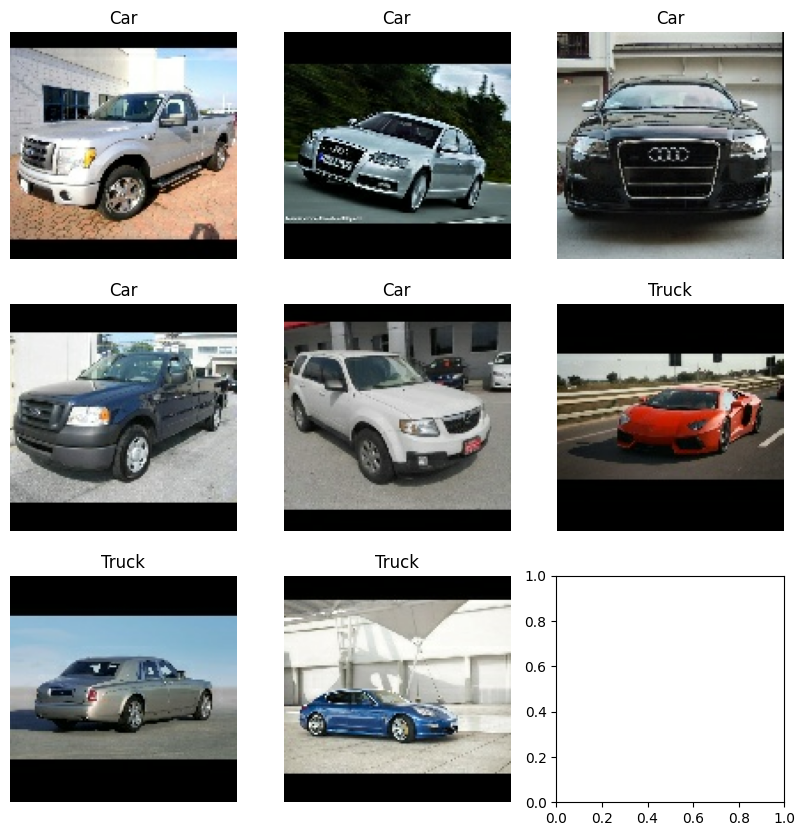

In [7]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [8]:
# normalize the dataset

def process(image, label):
  image  = tf.cast(image/255., tf.float32)
  label = tf.cast(label, tf.int32)

  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## 3. Model Training

    CNN sequential model

In [47]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,857 (12.64 MB)

 Trainable params: 3,313,409 (12.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.5688 - loss: 1.5100 - val_accuracy: 0.5980 - val_loss: 0.7290
Epoch 2/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6065 - loss: 0.6875 - val_accuracy: 0.6248 - val_loss: 0.7055
Epoch 3/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6661 - loss: 0.6247 - val_accuracy: 0.6931 - val_loss: 0.6459
Epoch 4/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7156 - loss: 0.5627 - val_accuracy: 0.7891 - val_loss: 0.4428
Epoch 5/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7404 - loss: 0.5137 - val_accuracy: 0.7941 - val_loss: 0.4607
Epoch 6/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8099 - loss: 0.3977 - val_accuracy: 0.8188 - val_loss: 0.4429
Epoch 7/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8507 - loss: 0.3428 - val_accuracy: 0.7653 - val_loss: 0.6231
Epoch 8/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8934 - loss: 0.2638 - val_accurac

## 4. Conclusion

    Able to achieve 0.8337 accuracy for truck and car classification